In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data= pd.read_excel(r"/content/DepiData.xlsx")

print(data.head())

   Unnamed: 0  Row ID                  Order ID Order Date  Ship Date  \
0           0   40098  CA-2014-AB10015140-41954 2014-11-11 2014-11-13   
1           1   26341    IN-2014-JR162107-41675 2014-02-05 2014-02-07   
2           2   25330    IN-2014-CR127307-41929 2014-10-17 2014-10-18   
3           3   13524   ES-2014-KM1637548-41667 2014-01-28 2014-01-30   
4           4   47221   SG-2014-RH9495111-41948 2014-11-05 2014-11-06   

      Ship Mode   Customer ID     Customer Name      Segment  Postal Code  \
0   First Class  AB-100151402     Aaron Bergman     Consumer      73120.0   
1  Second Class     JR-162107     Justin Ritter    Corporate          NaN   
2   First Class     CR-127307      Craig Reiter     Consumer          NaN   
3   First Class    KM-1637548  Katherine Murray  Home Office          NaN   
4      Same Day    RH-9495111       Rick Hansen     Consumer          NaN   

   ...  Season SalesGrowth SalesCategory DiscountEffect DiscountCategory  \
0  ...    Fall        

In [ ]:
fig1 = px.histogram(data,
                    x='Sales',
                    nbins=50,
                    title='Distribution of Sales',
                    marginal='box',
                    color_discrete_sequence=['blue'])

fig1.update_layout(xaxis_title='Sales', yaxis_title='Frequency')
fig1.show()

fig2 = px.histogram(data,
                    x='Profit',
                    nbins=50,
                    title='Distribution of Profit',
                    marginal='violin',
                    color_discrete_sequence=['green'])

fig2.update_layout(xaxis_title='Profit', yaxis_title='Frequency')
fig2.show()


In [ ]:
fig = px.scatter(data,
                 x='Discount',
                 y='Sales',
                 opacity=0.6,
                 color='Discount',
                 title='Sales vs. Discount')

fig.update_layout(xaxis_title='Discount', yaxis_title='Sales')
fig.show()


In [ ]:
category_counts = data['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Sales Count']

fig = px.bar(category_counts,
             x='Category',
             y='Sales Count',
             color='Sales Count',
             title='Sales Count by Product Category')

fig.update_layout(xaxis_title="Category",
                  yaxis_title="Number of Sales",
                  xaxis_tickangle=-45)

fig.show()



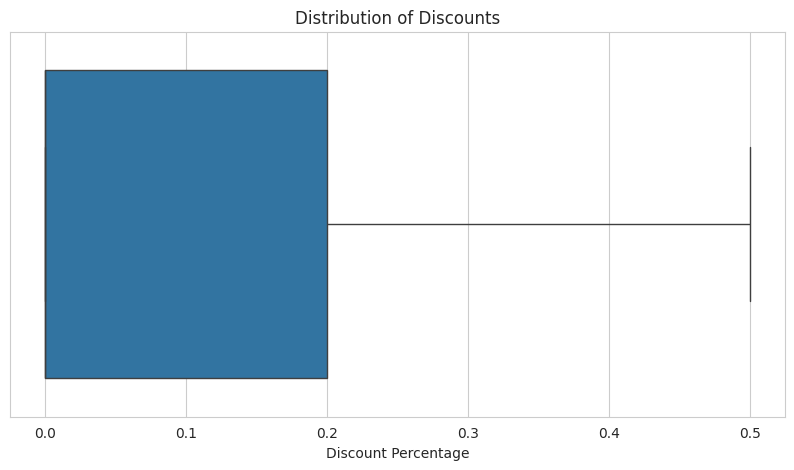

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Discount'])
plt.title("Distribution of Discounts")
plt.xlabel("Discount Percentage")
plt.show()

In [ ]:
print(data.dtypes)


Unnamed: 0                      int64
Row ID                          int64
Order ID                       object
Order Date             datetime64[ns]
Ship Date              datetime64[ns]
Ship Mode                      object
Customer ID                    object
Customer Name                  object
Segment                        object
Postal Code                   float64
City                           object
State                          object
Country                        object
Region                         object
Market                         object
Product ID                     object
Category                       object
Sub-Category                   object
Product Name                   object
Sales                         float64
Quantity                      float64
Discount                      float64
Profit                        float64
Shipping Cost                 float64
Order Priority                 object
economic_indicators            object
Unnamed: 26 

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')


In [ ]:
print(data['Order Date'].isnull().sum())


0


In [ ]:
data = data.dropna(subset=['Order Date'])


In [ ]:
import plotly.express as px

def plot_sales_over_time(region=None, year=None, promotion=None):
    filtered_df = filter_data(region, year, promotion)

    filtered_df = filtered_df.sort_values(by='Order Date')

    sales_trend = filtered_df.groupby('Order Date')['Sales'].sum().reset_index()

    if sales_trend.empty:
        print("No data available for the selected filters!")
        return

    fig = px.line(sales_trend, x='Order Date', y='Sales', title='Sales Over Time')
    fig.update_xaxes(title_text='Order Date', tickformat='%Y-%m-%d')
    fig.update_yaxes(title_text='Sales')
    fig.show()

plot_sales_over_time()


In [ ]:
import plotly.express as px
import pandas as pd

data['Profit'] = pd.to_numeric(data['Profit'], errors='coerce')

def plot_profit_by_region():
    region_profit = data.groupby('Region')['Profit'].sum().reset_index()

    fig = px.choropleth(region_profit,
                        locations='Region',
                        locationmode='ISO-3',
                        color='Profit',
                        title='Total Profit by Region',
                        color_continuous_scale='Blues')

    fig.update_layout(geo=dict(showcoastlines=True))
    fig.show()

plot_profit_by_region()


<ipython-input-58-d536af19800d>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




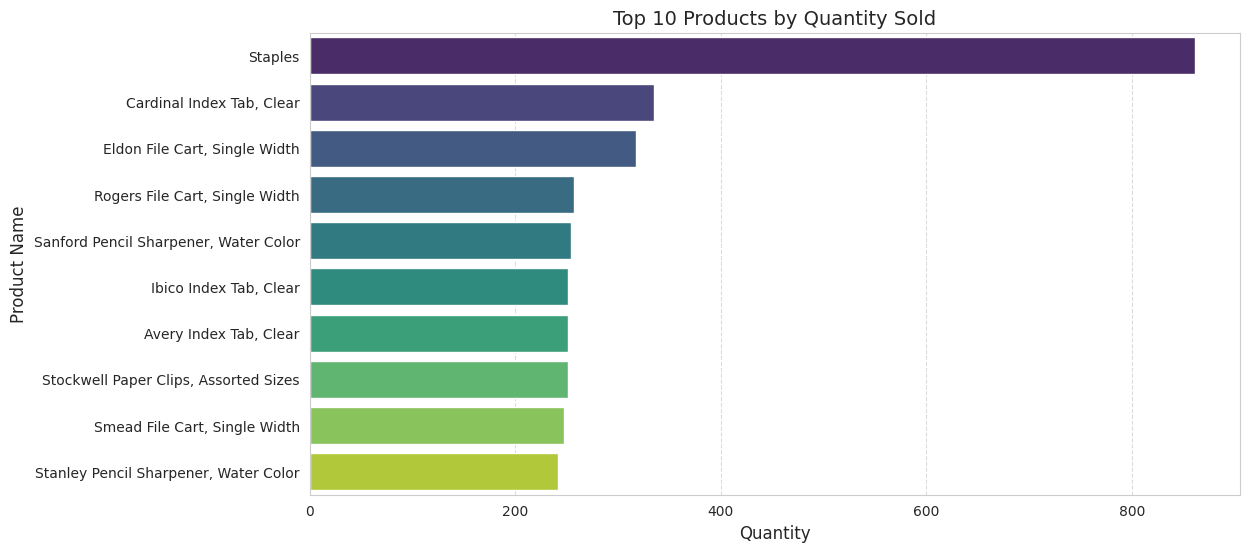

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

def plot_quantity_by_product(top_n=10):
    product_quantity = data.groupby('Product Name')['Quantity'].sum().reset_index()

    product_quantity = product_quantity.sort_values(by='Quantity', ascending=False).head(top_n)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=product_quantity, x='Quantity', y='Product Name', palette='viridis')

    plt.title(f'Top {top_n} Products by Quantity Sold', fontsize=14)
    plt.xlabel('Quantity', fontsize=12)
    plt.ylabel('Product Name', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

plot_quantity_by_product(10)
